In [110]:
%matplotlib inline

import pandas as pd
import akshare as ak
import quantstats as qs
import matplotlib.pyplot as plt

from finquant.portfolio import build_portfolio
from finquant import returns
from IPython.display import display

import warnings
warnings.filterwarnings(action='ignore')

In [34]:
# 读取股票基金量化指标计算结果
fund_matrix = pd.read_excel('data/fund_matrix.xlsx',
                            usecols='B:I',
                            dtype={'fund_code':str})
display(fund_matrix)

,fund_code,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
0,000082,嘉实研究阿尔法股票,0.671314,0.912618,-0.431181,-0.019135,-0.035152,0.189548
1,000309,大摩品质生活精选股票,0.680630,0.924815,-0.569028,-0.028378,-0.048255,0.281205
2,000326,南方中小盘成长股票,0.916061,1.302787,-0.227615,-0.013083,-0.021236,0.130858
3,000409,鹏华环保产业股票,0.868338,1.222053,-0.491221,-0.028100,-0.045264,0.280522
4,000411,景顺长城优质成长股票,0.460136,0.630492,-0.497608,-0.023474,-0.041226,0.230615
...,...,...,...,...,...,...,...,...
789,920003,中金新锐股票A,1.200071,1.740833,-0.296932,-0.019216,-0.025922,0.194384
790,920922,中金精选股票C,-0.243946,-0.321725,-0.337647,-0.019303,-0.026547,0.184570
791,920923,中金新锐股票C,1.208971,1.761144,-0.330795,-0.022207,-0.030583,0.224730
792,970041,国海量化优选一年持有股票A,-0.319185,-0.396108,-0.247322,-0.021488,-0.030855,0.204876


In [42]:
# 计算基金各个指标分位数矩阵
q = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,1]
fund_matrix_vol_quantile = fund_matrix.quantile(q=q,interpolation='linear')
display(fund_matrix_vol_quantile)

C:\Users\ThinkPad\.conda\envs\qtconda\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,sharpe,sortino,max_drawdown,var,cvar,volatility
0.0,-224488.217356,-15.874508,-0.854600,-0.047220,-0.068851,1.122609e-07
0.1,-1.497810,-1.960469,-0.510384,-0.033248,-0.048847,1.926803e-01
0.2,-0.967948,-1.290744,-0.463056,-0.030776,-0.044303,2.140052e-01
0.3,-0.418727,-0.581078,-0.431793,-0.029048,-0.042061,2.282952e-01
0.4,0.082826,0.109432,-0.408521,-0.027748,-0.039883,2.400543e-01
0.5,0.315224,0.439859,-0.378988,-0.026317,-0.037618,2.563595e-01
0.6,0.453654,0.628753,-0.349293,-0.024810,-0.035726,2.659592e-01
0.7,0.574056,0.803476,-0.319324,-0.023502,-0.033994,2.801638e-01
0.8,0.693598,0.986924,-0.278388,-0.021887,-0.031939,2.952067e-01
0.9,0.896331,1.292821,-0.234140,-0.019670,-0.029032,3.195654e-01


In [43]:
display(type(fund_matrix_vol_quantile))
# 分位数矩阵的数据结构为DataFrame

pandas.core.frame.DataFrame

In [40]:
# 使用fvq标识波动率的分位数列表
fvq = fund_matrix_vol_quantile.volatility
display(fvq)

0.0    1.122609e-07
0.1    1.926803e-01
0.2    2.140052e-01
0.3    2.282952e-01
0.4    2.400543e-01
0.5    2.563595e-01
0.6    2.659592e-01
0.7    2.801638e-01
0.8    2.952067e-01
0.9    3.195654e-01
1.0    4.464938e-01
Name: volatility, dtype: float64

根据波动率分组，第一组为波动率为10%分位数以内的基金，第二组为波动率为10%分位数到20%分位数的基金，第三组、第四组、第五组以此类推，仅提取50%分位数以内的基金

**第一组**

In [59]:
# 第一组基金fmv1
fmv1 = fund_matrix[fund_matrix.volatility <= fvq[0.1]]
fmv1.sort_values(by="sharpe",ascending=False)

,fund_code,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
683,014140,易方达高质量增长量化精选股票C,51.990496,inf,0.000000,0.001392,0.001392,1.355364e-02
682,014139,易方达高质量增长量化精选股票A,48.862524,inf,0.000000,0.001325,0.001325,1.467859e-02
749,015773,招商移动互联网产业股票基金C,16.668426,inf,0.000000,-0.006101,-0.006101,1.628057e-01
119,001678,英大国企改革主题股票,1.206185,1.779887,-0.186090,-0.018632,-0.029280,1.885287e-01
363,008128,湘财长源股票型A,1.126501,1.651569,-0.154822,-0.017642,-0.024301,1.779405e-01
...,...,...,...,...,...,...,...,...
686,014186,招商专精特新股票C,-1.829717,-2.441934,-0.140200,-0.015156,-0.022550,1.366889e-01
660,013491,同泰金融精选股票C,-1.858246,-2.257365,-0.156482,-0.021061,-0.031064,1.897601e-01
669,013899,上投摩根全景优势股票A,-2.315603,-2.848283,-0.137100,-0.017294,-0.021502,1.533106e-01
670,013900,上投摩根全景优势股票C,-2.387554,-2.928237,-0.138300,-0.017329,-0.021524,1.532340e-01


易方达高质量增长量化、招商移动互联网、中欧核心消费成立不足1年，不做参考。除此之外，进一步筛选出sharpe高于1的基金。

In [74]:
fmv1_sharpe = fmv1[(fmv1.sharpe >= 1) & (fmv1.max_drawdown < 0)]
fmv1_sharpe=fmv1_sharpe.sort_values(by='sharpe', ascending=False)
fmv1_sharpe.set_index('fund_code',inplace=True)
display(fmv1_sharpe)

,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
fund_code,,,,,,,
001678,英大国企改革主题股票,1.206185,1.779887,-0.186090,-0.018632,-0.029280,0.188529
008128,湘财长源股票型A,1.126501,1.651569,-0.154822,-0.017642,-0.024301,0.177941
015085,中欧核心消费股票发起A,1.116141,1.505387,-0.020598,-0.015476,-0.020598,0.156032
008129,湘财长源股票型C,1.093363,1.600435,-0.155543,-0.017654,-0.024319,0.177828
001718,工银物流产业股票A,1.088749,1.581550,-0.324028,-0.018948,-0.030442,0.190821
003298,嘉实物流产业股票A,1.085220,1.577697,-0.246200,-0.017693,-0.027785,0.178165
003299,嘉实物流产业股票C,1.065546,1.547937,-0.246200,-0.017721,-0.028201,0.178301
320020,诺安策略精选股票,1.024925,1.423832,-0.202271,-0.010901,-0.019164,0.109502
001736,圆信永丰优加生活,1.022877,1.473448,-0.284009,-0.018931,-0.028455,0.190150


In [80]:
fmv1_sharpe.index

Index(['001678', '008128', '015085', '008129', '001718', '003298', '003299',
       '320020', '001736'],
      dtype='object', name='fund_code')

In [94]:
# 嘉实物流产业股票A和嘉实物流产业股票C为同一只基金的不同份额，策略一致。
fmv1_code = ['001678', '008128', '008129', '001718', '003298', '320020', '001736']

**第二组**

In [76]:
# 第二组基金fmv2
fmv2 = fund_matrix[(fund_matrix.volatility <= fvq[0.2]) & (fund_matrix.volatility > fvq[0.1])]
fmv2.sort_values(by="sharpe",ascending=False)

,fund_code,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
748,015593,国泰金鑫股票C,15.798926,inf,0.000000,-0.008756,-0.008756,0.213972
789,920003,中金新锐股票A,1.200071,1.740833,-0.296932,-0.019216,-0.025922,0.194384
199,004350,汇丰晋信价值先锋股票A,1.185205,1.723887,-0.263651,-0.019761,-0.031318,0.199785
105,001579,国泰大农业股票A,1.016749,1.485969,-0.233251,-0.019659,-0.028587,0.197413
125,001714,工银文体产业股票A,1.007528,1.458796,-0.292922,-0.019940,-0.029647,0.200160
...,...,...,...,...,...,...,...,...
477,010204,中银港股通优势成长股票,-1.759222,-2.236562,-0.398487,-0.022305,-0.031513,0.201676
560,011285,民生价值优选6个月持有股票A,-1.828273,-2.416843,-0.332637,-0.023218,-0.029252,0.209416
637,012835,招商景气精选股票A,-1.848624,-2.346615,-0.253544,-0.021470,-0.027105,0.193507
561,011286,民生价值优选6个月持有股票C,-1.851919,-2.444316,-0.334893,-0.023261,-0.029337,0.209624


国泰金鑫成立不足1年，不做参考。除此之外，进一步筛选出sharpe高于1的基金。

In [78]:
fmv2_sharpe = fmv2[(fmv2.sharpe >= 1) & (fmv2.max_drawdown < 0)]
fmv2_sharpe=fmv2_sharpe.sort_values(by='sharpe', ascending=False)
fmv2_sharpe.set_index('fund_code',inplace=True)
display(fmv2_sharpe)

,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
fund_code,,,,,,,
920003,中金新锐股票A,1.200071,1.740833,-0.296932,-0.019216,-0.025922,0.194384
004350,汇丰晋信价值先锋股票A,1.185205,1.723887,-0.263651,-0.019761,-0.031318,0.199785
001579,国泰大农业股票A,1.016749,1.485969,-0.233251,-0.019659,-0.028587,0.197413
001714,工银文体产业股票A,1.007528,1.458796,-0.292922,-0.019940,-0.029647,0.200160


In [82]:
fmv2_sharpe.index

Index(['920003', '004350', '001579', '001714'], dtype='object', name='fund_code')

In [83]:
fmv2_code = ['920003', '004350', '001579', '001714']

**第三组**

In [63]:
# 第三组基金fmv3
fmv3 = fund_matrix[(fund_matrix.volatility <= fvq[0.3]) & (fund_matrix.volatility > fvq[0.2])]
fmv3.sort_values(by="sharpe",ascending=False)

,fund_code,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
552,011229,创金合信数字经济主题股票A,1.404878,2.026740,-0.266568,-0.021705,-0.033509,0.221392
553,011230,创金合信数字经济主题股票C,1.381110,1.990151,-0.267707,-0.021717,-0.033521,0.221297
353,007950,招商量化精选股票C,1.248979,1.698922,-0.253450,-0.021585,-0.034937,0.218784
791,920923,中金新锐股票C,1.208971,1.761144,-0.330795,-0.022207,-0.030583,0.224730
115,001645,国泰大健康股票A,0.995106,1.466300,-0.371145,-0.022271,-0.032201,0.223456
...,...,...,...,...,...,...,...,...
483,010331,天弘消费股票A,-1.492866,-1.930528,-0.337535,-0.024268,-0.033650,0.221545
484,010332,天弘消费股票C,-1.515067,-1.957058,-0.339608,-0.024283,-0.033665,0.221507
611,011883,招商蓝筹精选股票C,-1.539504,-2.061495,-0.313859,-0.024986,-0.030536,0.227719
623,012214,民生加银核心资产股票A,-1.890688,-2.538428,-0.222976,-0.024792,-0.028758,0.223109


进一步筛选出sharpe高于1的基金。

In [79]:
fmv3_sharpe = fmv3[(fmv3.sharpe >= 1) & (fmv3.max_drawdown < 0)]
fmv3_sharpe=fmv3_sharpe.sort_values(by='sharpe', ascending=False)
fmv3_sharpe.set_index('fund_code', inplace=True)
display(fmv3_sharpe)

,fund_abb,sharpe,sortino,max_drawdown,var,cvar,volatility
fund_code,,,,,,,
011229,创金合信数字经济主题股票A,1.404878,2.026740,-0.266568,-0.021705,-0.033509,0.221392
011230,创金合信数字经济主题股票C,1.381110,1.990151,-0.267707,-0.021717,-0.033521,0.221297
007950,招商量化精选股票C,1.248979,1.698922,-0.253450,-0.021585,-0.034937,0.218784
920923,中金新锐股票C,1.208971,1.761144,-0.330795,-0.022207,-0.030583,0.224730


In [84]:
fmv3_sharpe.index

Index(['011229', '011230', '007950', '920923'], dtype='object', name='fund_code')

In [85]:
# 创金合信数字经济主体股票A和创金合信数字经济主体股票C为同策略基金的不同份额
fmv3_code = ['011229', '007950', '920923']

**组合分析**
根据波动率选出三组基金，如果安装等权配置，三组基金的回报情况如何？

In [90]:
# 获取数据函数
def GetFundInfoByAkshare(fund, indicator):
    fund_open_fund_info_em_df = ak.fund_open_fund_info_em(fund=fund, indicator=indicator)
    return fund_open_fund_info_em_df

# 格式化数据
def FormatData(fund_open_fund_info_em_df):
    data = fund_open_fund_info_em_df
    data.rename(columns={'净值日期':'date', '累计净值':'c'+code}, inplace=True)
    data.date = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    return data

**第一组基金构建组合**

In [122]:
fp1_data = pd.DataFrame()

for code in fmv1_code:
    df = GetFundInfoByAkshare(fund=code,indicator='累计净值走势')
    f_df = FormatData(df)
    fp1_data = pd.concat([fp1_data,f_df], axis=1)

fp1_data.dropna(inplace=True)
display(fp1_data)

,c001678,c008128,c008129,c001718,c003298,c320020,c001736
date,,,,,,,
2019-12-18,1.2287,1.0000,1.0000,1.690,1.440,1.9899,1.6120
2019-12-20,1.2267,1.0000,1.0000,1.679,1.438,1.9927,1.6030
2019-12-27,1.2362,1.0000,0.9998,1.683,1.460,2.0116,1.6060
2019-12-31,1.2535,0.9999,0.9997,1.714,1.489,2.0472,1.6430
2020-01-03,1.2833,0.9999,0.9997,1.749,1.486,2.0889,1.6740
...,...,...,...,...,...,...,...
2022-05-18,1.9395,1.5122,1.4920,3.092,2.407,2.7054,2.8989
2022-05-19,1.9410,1.5116,1.4914,3.090,2.417,2.7100,2.9119
2022-05-20,1.9894,1.5262,1.5058,3.129,2.473,2.7406,2.9565


In [123]:
pf1 = build_portfolio(data=fp1_data)
pf1.properties()

----------------------------------------------------------------------
Stocks: c001678, c008128, c008129, c001718, c003298, c320020, c001736
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.225
Portfolio Volatility: 0.170
Portfolio Sharpe Ratio: 1.296

Skewness:
    c001678   c008128   c008129   c001718   c003298   c320020   c001736
0 -0.568903 -0.636408 -0.643426 -0.272586 -0.442687 -0.360606 -0.738818

Kurtosis:
    c001678   c008128   c008129   c001718   c003298   c320020  c001736
0 -0.831473 -0.736083 -0.726535 -1.241386 -0.902051 -0.858463 -0.79571

Information:
   Allocation     Name
0    0.142857  c001678
1    0.142857  c008128
2    0.142857  c008129
3    0.142857  c001718
4    0.142857  c003298
5    0.142857  c320020
6    0.142857  c001736
----------------------------------------------------------------------


**第二组基金构建组合**

In [124]:
fp2_data = pd.DataFrame()

for code in fmv2_code:
    df = GetFundInfoByAkshare(fund=code,indicator='累计净值走势')
    f_df = FormatData(df)
    fp2_data = pd.concat([fp2_data,f_df], axis=1)

fp2_data.dropna(inplace=True)
display(fp2_data)

,c920003,c004350,c001579,c001714
date,,,,
2020-04-07,2.5619,1.4275,1.9040,2.098
2020-04-08,2.5605,1.4287,1.8840,2.083
2020-04-09,2.5715,1.4457,1.9050,2.103
2020-04-10,2.5369,1.4257,1.8900,2.076
2020-04-13,2.5274,1.4175,1.8770,2.061
...,...,...,...,...
2022-05-18,3.8288,2.0588,2.2890,3.009
2022-05-19,3.8747,2.0537,2.2890,3.009
2022-05-20,3.9312,2.0849,2.3133,3.053


In [125]:
pf2 = build_portfolio(data=fp2_data)
pf2.properties()

----------------------------------------------------------------------
Stocks: c920003, c004350, c001579, c001714
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.177
Portfolio Volatility: 0.178
Portfolio Sharpe Ratio: 0.968

Skewness:
    c920003   c004350   c001579   c001714
0  0.015727 -0.272718 -0.991602 -0.901389

Kurtosis:
   c920003   c004350   c001579   c001714
0 -1.14481 -0.395464  1.438958  0.068173

Information:
   Allocation     Name
0        0.25  c920003
1        0.25  c004350
2        0.25  c001579
3        0.25  c001714
----------------------------------------------------------------------


**第三组基金构建组合**

In [126]:
fp3_data = pd.DataFrame()

for code in fmv3_code:
    df = GetFundInfoByAkshare(fund=code,indicator='累计净值走势')
    f_df = FormatData(df)
    fp3_data = pd.concat([fp3_data,f_df], axis=1)

fp3_data.dropna(inplace=True)
display(fp3_data)

,c011229,c007950,c920923
date,,,
2021-01-20,1.0000,1.6130,3.1427
2021-01-22,0.9999,1.6388,3.1716
2021-01-29,0.9983,1.5743,3.0226
2021-02-05,1.0105,1.5588,2.9388
2021-02-08,1.0185,1.5721,3.0119
...,...,...,...
2022-05-18,1.4083,1.8060,3.3141
2022-05-19,1.4081,1.8183,3.3594
2022-05-20,1.4270,1.8450,3.4153


In [127]:
pf3 = build_portfolio(data=fp3_data)
pf3.properties()

----------------------------------------------------------------------
Stocks: c011229, c007950, c920923
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.155
Portfolio Volatility: 0.209
Portfolio Sharpe Ratio: 0.717

Skewness:
    c011229   c007950   c920923
0 -0.119473 -0.007922 -0.168986

Kurtosis:
    c011229   c007950   c920923
0 -1.235988 -0.905569 -1.326828

Information:
   Allocation     Name
0    0.333333  c011229
1    0.333333  c007950
2    0.333333  c920923
----------------------------------------------------------------------


**结论**

第一组基金等权组合表现：
Stocks: c001678, c008128, c008129, c001718, c003298, c320020, c001736
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.225
Portfolio Volatility: 0.170
Portfolio Sharpe Ratio: 1.296

第二组基金等权组合表现：
Stocks: c920003, c004350, c001579, c001714
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.177
Portfolio Volatility: 0.178
Portfolio Sharpe Ratio: 0.968

第三组基金等权组合表现：
Stocks: c011229, c007950, c920923
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.155
Portfolio Volatility: 0.209
Portfolio Sharpe Ratio: 0.717

**通过对股票基金进行波动率分层，优选各层中夏普比高的公募基金构建等权组合，从组合业绩表现来看，低波动组的基金组合表现最优，而高波动组的基金组合表现最差。**
**说明针对股票基金进行波动率分层后进行筛选的策略是有效的**


**组合一：低波动组**

In [137]:
fp1_ret = pf1.comp_daily_returns()
fp1_ret['ret'] =fp1_ret.apply(lambda x: x.sum()/7, axis=1)
display(fp1_ret)

,c001678,c008128,c008129,c001718,c003298,c320020,c001736,ret
Date,,,,,,,,
2019-12-20,-0.001628,0.000000,0.000000,-0.006509,-0.001389,0.001407,-0.005583,-0.001957
2019-12-27,0.007744,0.000000,-0.000200,0.002382,0.015299,0.009485,0.001871,0.005226
2019-12-31,0.013994,-0.000100,-0.000100,0.018419,0.019863,0.017697,0.023039,0.013259
2020-01-03,0.023773,0.000000,0.000000,0.020420,-0.002015,0.020369,0.018868,0.011631
2020-01-10,-0.005922,-0.000100,-0.000200,0.023442,0.019515,-0.083537,0.014934,-0.004552
...,...,...,...,...,...,...,...,...
2022-05-18,-0.012273,-0.007743,-0.007715,-0.002902,-0.009465,0.001814,0.003392,-0.004985
2022-05-19,0.000773,-0.000397,-0.000402,-0.000647,0.004155,0.001700,0.004484,0.001381
2022-05-20,0.024936,0.009659,0.009655,0.012621,0.023169,0.011292,0.015316,0.015235


In [138]:
fp1_returns = pd.Series(fp1_ret.ret)

                           Strategy
-------------------------  ----------
Start Period               2019-12-20
End Period                 2022-05-24
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          61.19%
CAGR﹪                     21.73%

Sharpe                     1.33
Prob. Sharpe Ratio         97.9%
Smart Sharpe               1.27
Sortino                    1.88
Smart Sortino              1.81
Sortino/√2                 1.33
Smart Sortino/√2           1.28
Omega                      1.25

Max Drawdown               -18.36%
Longest DD Days            139
Volatility (ann.)          16.96%
Calmar                     1.18
Skew                       -0.54
Kurtosis                   2.45

Expected Daily %           0.08%
Expected Monthly %         1.6%
Expected Yearly %          12.68%
Kelly Criterion            11.27%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.67%
Expected Shortfall (cVaR)  -1.67%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-05,2022-04-26,2022-05-24,139,-18.356259,-16.921473
2,2020-02-26,2020-03-23,2020-06-19,114,-12.330328,-10.681832
3,2020-01-21,2020-02-03,2020-02-10,20,-6.976196,-4.124808
4,2020-07-14,2020-07-16,2020-08-03,20,-6.081994,-5.204343
5,2021-07-23,2021-07-28,2021-08-11,19,-5.297772,-3.966472


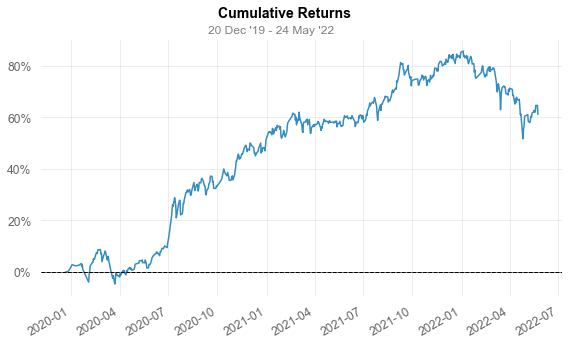

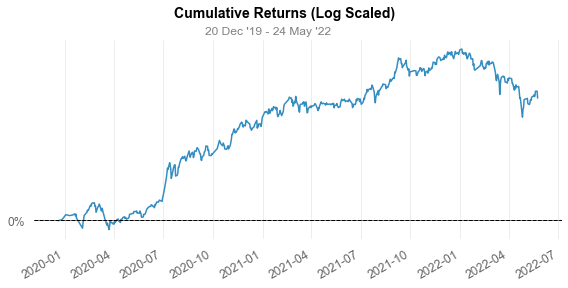

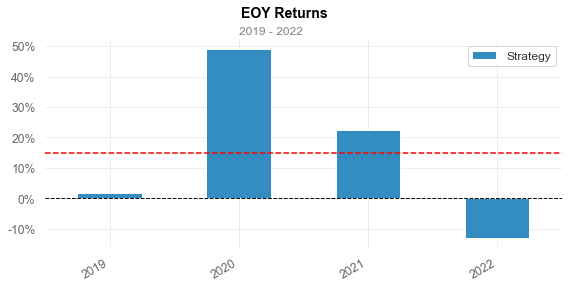

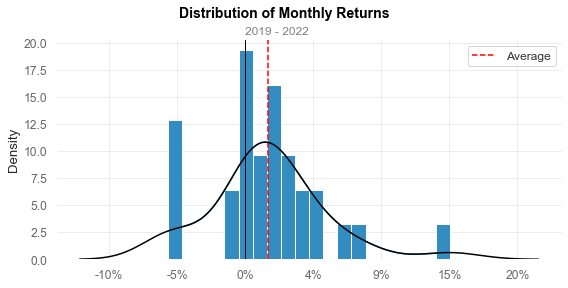

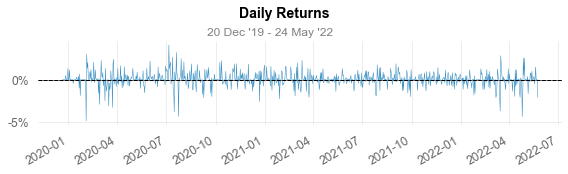

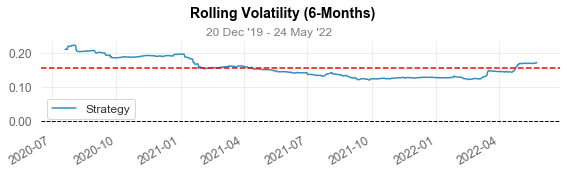

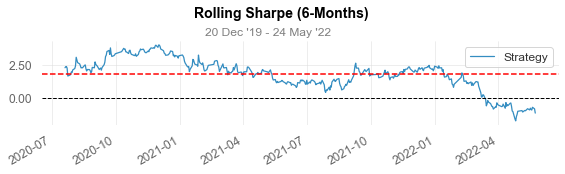

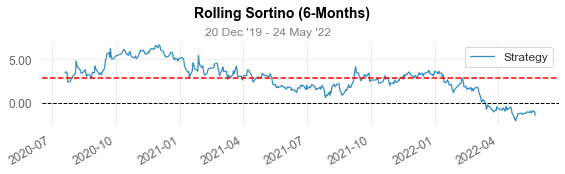

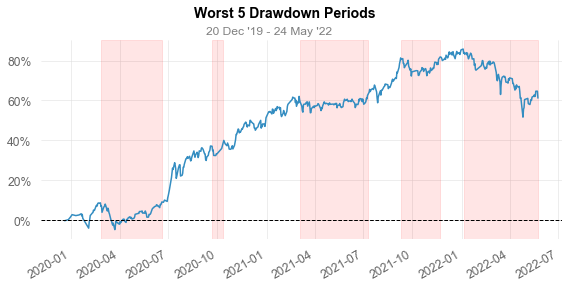

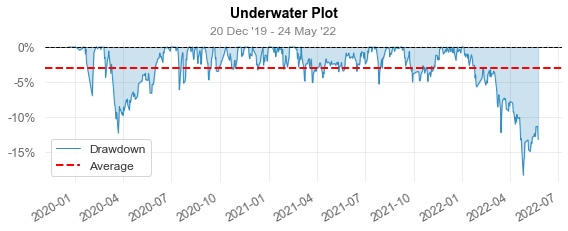

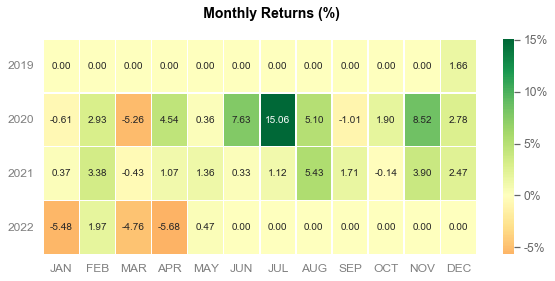

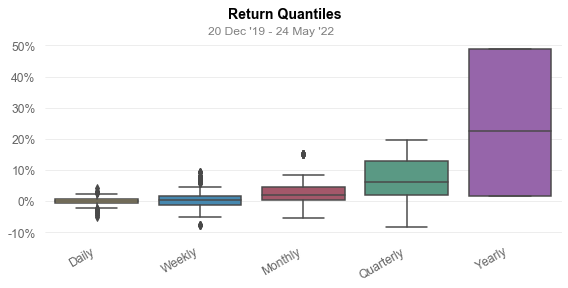

In [139]:
qs.reports.full(fp1_returns)

**组合二：中波动组**

In [140]:
fp2_ret = pf2.comp_daily_returns()
fp2_ret['ret'] =fp2_ret.apply(lambda x: x.sum()/4, axis=1)
display(fp2_ret)

,c920003,c004350,c001579,c001714,ret
Date,,,,,
2020-04-08,-0.000546,0.000841,-0.010504,-0.007150,-0.004340
2020-04-09,0.004296,0.011899,0.011146,0.009602,0.009236
2020-04-10,-0.013455,-0.013834,-0.007874,-0.012839,-0.012001
2020-04-13,-0.003745,-0.005752,-0.006878,-0.007225,-0.005900
2020-04-14,0.013057,0.019683,0.017048,0.025230,0.018755
...,...,...,...,...,...
2022-05-18,0.005436,-0.000922,-0.007372,-0.004631,-0.001872
2022-05-19,0.011988,-0.002477,0.000000,0.000000,0.002378
2022-05-20,0.014582,0.015192,0.010616,0.014623,0.013753


                           Strategy
-------------------------  ----------
Start Period               2020-04-08
End Period                 2022-05-24
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          39.08%
CAGR﹪                     16.79%

Sharpe                     1.0
Prob. Sharpe Ratio         92.53%
Smart Sharpe               0.94
Sortino                    1.4
Smart Sortino              1.32
Sortino/√2                 0.99
Smart Sortino/√2           0.93
Omega                      1.18

Max Drawdown               -24.06%
Longest DD Days            141
Volatility (ann.)          17.79%
Calmar                     0.7
Skew                       -0.45
Kurtosis                   1.32

Expected Daily %           0.06%
Expected Monthly %         1.28%
Expected Yearly %          11.62%
Kelly Criterion            8.15%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.77%
Expected Shortfall (cVaR)  -1.77%

Max Consecutive Wins       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-05,2022-04-26,2022-05-24,139,-24.055957,-22.791059
2,2021-02-22,2021-03-24,2021-07-13,141,-10.013882,-9.714578
3,2020-09-03,2020-09-10,2020-12-02,90,-7.811059,-7.757381
4,2021-07-23,2021-07-28,2021-08-10,18,-6.000949,-5.072231
5,2020-07-14,2020-07-16,2020-07-31,17,-5.584105,-4.623091


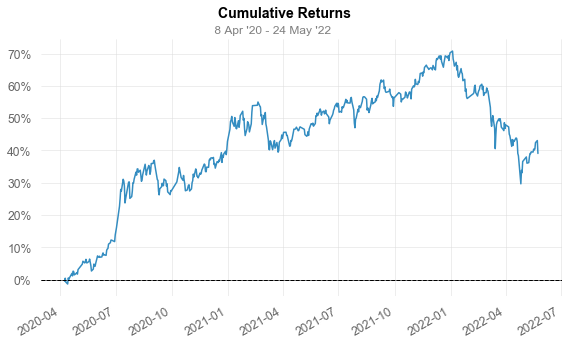

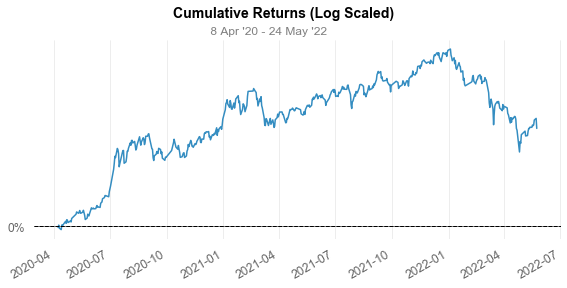

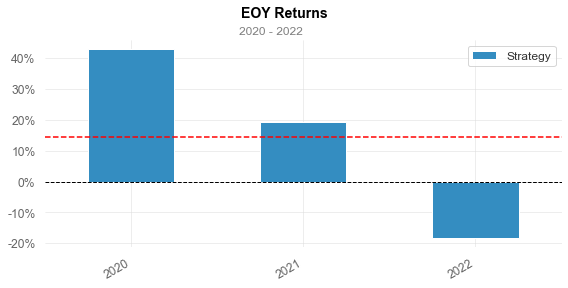

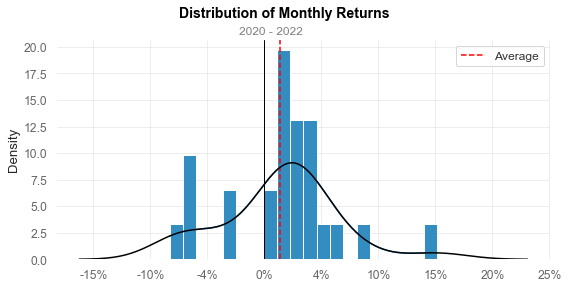

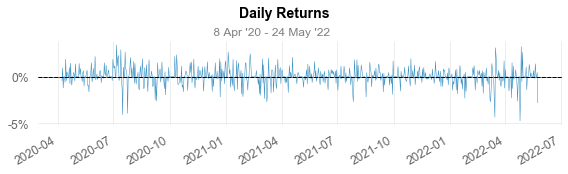

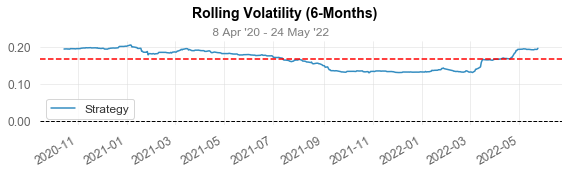

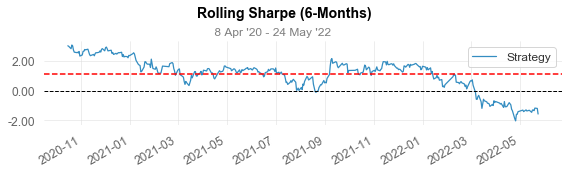

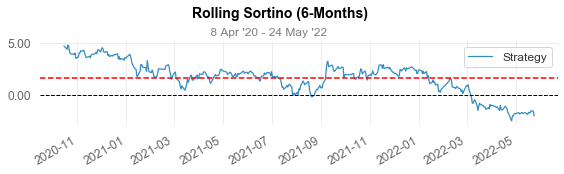

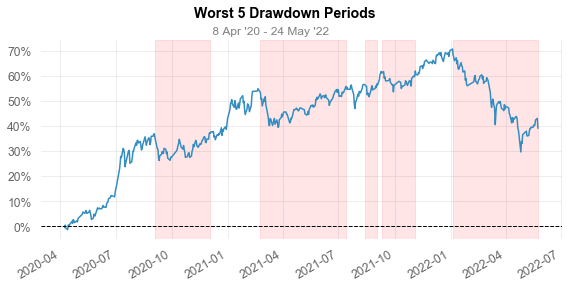

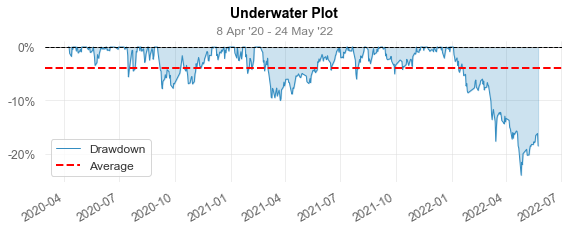

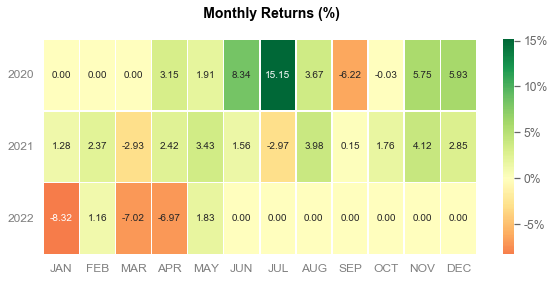

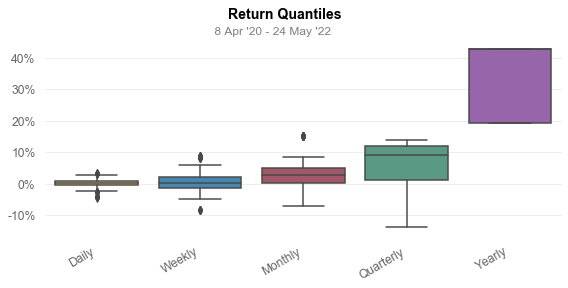

In [141]:
fp2_returns = pd.Series(fp2_ret.ret)
qs.reports.full(fp2_returns)

**组合三：高波动组**

In [142]:
fp3_ret = pf3.comp_daily_returns()
fp3_ret['ret'] =fp3_ret.apply(lambda x: x.sum()/3, axis=1)
display(fp3_ret)

,c011229,c007950,c920923,ret
Date,,,,
2021-01-22,-0.000100,0.015995,0.009196,0.008364
2021-01-29,-0.001600,-0.039358,-0.046979,-0.029313
2021-02-05,0.012221,-0.009846,-0.027724,-0.008450
2021-02-08,0.007917,0.008532,0.024874,0.013774
2021-02-09,0.011193,0.024235,0.031774,0.022401
...,...,...,...,...
2022-05-18,0.000426,-0.001714,0.006224,0.001646
2022-05-19,-0.000142,0.006811,0.013669,0.006779
2022-05-20,0.013422,0.014684,0.016640,0.014915


                           Strategy
-------------------------  ----------
Start Period               2021-01-22
End Period                 2022-05-24
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          17.91%
CAGR﹪                     13.14%

Sharpe                     0.74
Prob. Sharpe Ratio         79.89%
Smart Sharpe               0.71
Sortino                    0.99
Smart Sortino              0.95
Sortino/√2                 0.7
Smart Sortino/√2           0.67
Omega                      1.13

Max Drawdown               -26.11%
Longest DD Days            140
Volatility (ann.)          20.93%
Calmar                     0.5
Skew                       -0.78
Kurtosis                   2.39

Expected Daily %           0.05%
Expected Monthly %         0.97%
Expected Yearly %          8.59%
Kelly Criterion            6.74%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.11%
Expected Shortfall (cVaR)  -2.11%

Max Consecutive Wins       

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-01-04,2022-04-26,2022-05-24,140,-26.110071,-24.339230
2,2021-09-14,2021-10-12,2021-12-13,90,-11.595303,-11.494846
3,2021-03-04,2021-03-10,2021-04-19,46,-6.603682,-6.004285
4,2021-07-23,2021-07-28,2021-08-04,12,-6.056356,-4.119567
5,2021-01-29,2021-02-05,2021-02-10,12,-3.751465,-2.931256


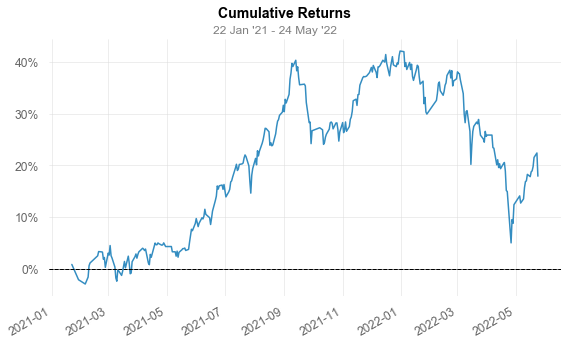

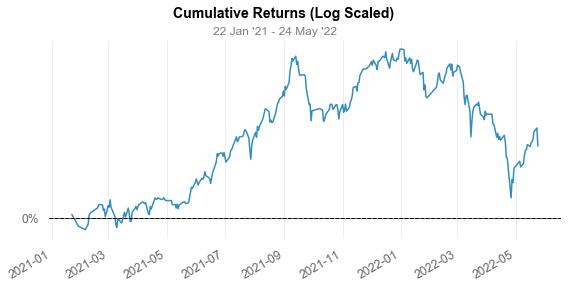

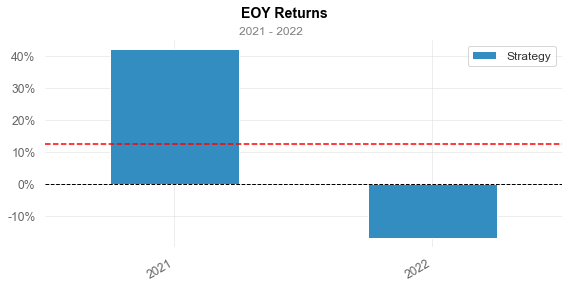

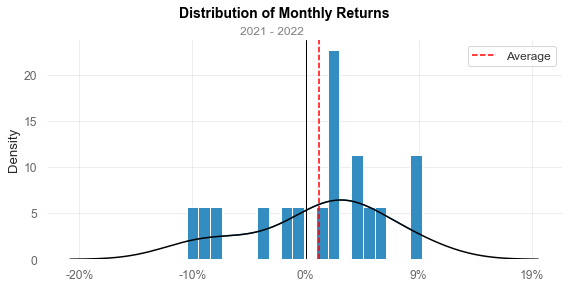

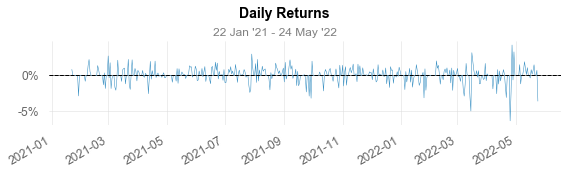

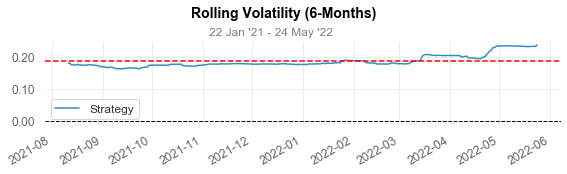

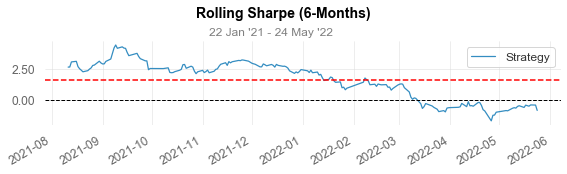

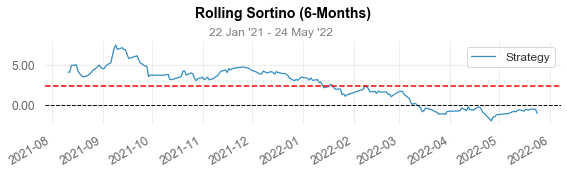

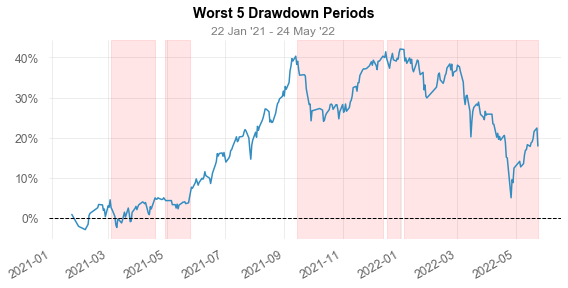

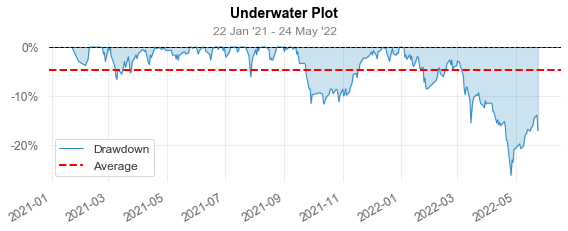

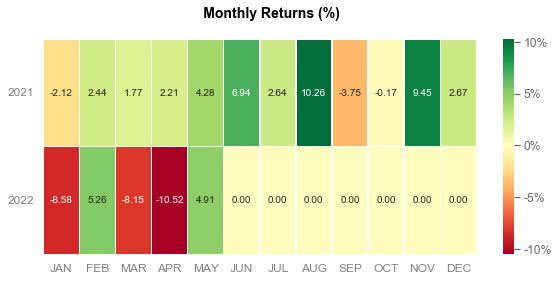

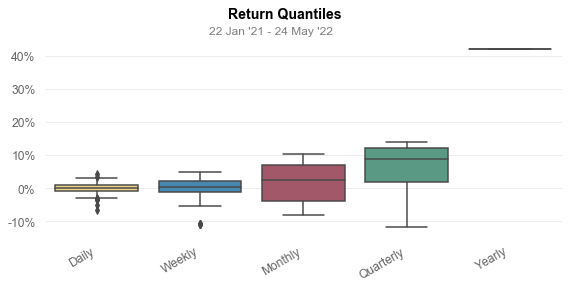

In [143]:
fp3_returns = pd.Series(fp3_ret.ret)
qs.reports.full(fp3_returns)